# BigMart Mini Project
## Project Description
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 
The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

We will handle this problem in a structured way. We will be following the table of content given below.
## Table of Content
1. Problem Statement
2. Hypothesis Generation
3. Loading Packages and Data
4. Data Structure and Content
5. Exploratory Data Analysis
6. Univariate Analysis
7. Bivariate Analysis
8. Missing Value Treatment
9. Feature Engineering
10. Encoding Categorical Variables
11. Label Encoding
12. One Hot Encoding
13. PreProcessing Data
14. Modeling
15. Linear Regression
16. Regularized Linear Regression
17. RandomForest
18. XGBoost
19. Summary

Following is the link to explore the information related to each topic specifically.

https://shahyaseen71.gitbook.io/technocolabs-mini-project/your-task

## The Business Problem Exploring
The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

## The Dataset 
Extracting the BigMart Data set

In [3]:
# importing required modules
from zipfile import ZipFile
  
# specifying the zip file name
file_name = "9961_14084_bundle_archive.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')


File Name                                             Modified             Size
Test.csv                                       2019-09-26 10:11:34       527709
Train.csv                                      2019-09-26 10:11:34       869537
Extracting all the files now...
Done!


In [4]:
import pandas as pd

# Reading data set using pandas
bigMart_data = pd.read_csv('Train.csv')

In [5]:
bigMart_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


Importing Important libraries which we will use further in the project

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Exploratory Data Analysis (eda) - Outliers

The head function will tell you the top records in the data set. By default, python shows you only the top 5 records.

In [7]:
bigMart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


The shape attribute tells us a number of observations and variables we have in the data set. It is used to check the dimension of data.

In [9]:
bigMart_data.shape

(8523, 12)

In [13]:
#corr() shows us the correlation of the numerical feartures with our output attribute
#Compute pairwise correlation of columns, excluding NA/null values.
# bigMart_data.corr()["Item_Outlet_Sales"]

info() is used to check the Information about the data and the datatypes of each respective attribute.

In [11]:
bigMart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Dealing with Missing Values

How many missing data points do we have? Let's see how many we have in each column.

In [12]:
# get the number of missing data points per column
missing_values_count = bigMart_data.isnull().sum()

# Printing the missing points in the data set
print(missing_values_count)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


That seems like a lot! It might be helpful to see what percentage of the values in our dataset were missing to give us a better sense of the scale of this problem:

In [14]:
# how many total missing values do we have?
total_cells = np.product(bigMart_data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing, '%')

3.786812155344362 %


Filling in missing values automatically
We can use the Panda's fillna() function to fill in missing values in a dataframe for us. One option we have is to specify what we want the NaN values to be replaced with. Here, I'm saying that I would like to replace all the NaN values with 0.

In [9]:
bigMart_data.fillna(0)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,0,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,0,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


I could also be a bit more savvy and replace missing values with whatever value comes directly after it in the same column. (This makes a lot of sense for datasets where the observations have some sort of logical order to them.)

In [15]:
bigMart_data.fillna(method='bfill', axis=1).fillna(0)

C:\Users\pc planet\AppData\Local\Temp\ipykernel_11928\4112042477.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bigMart_data.fillna(method='bfill', axis=1).fillna(0)
C:\Users\pc planet\AppData\Local\Temp\ipykernel_11928\4112042477.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bigMart_data.fillna(method='bfill', axis=1).fillna(0)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.38,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Tier 2,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.6,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


Using ffill statements for the missing values just as a try
Replace missing values with whatever value comes directly before it in the same column.

In [16]:
bigMart_data.loc[:,bigMart_data.columns] = bigMart_data.loc[:,bigMart_data.columns].ffill()
# get the number of missing data points per column
missing_values_count = bigMart_data.isnull().sum()
# Printing the missing points in the data set
print(missing_values_count)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


The described method will help to see how data has been spread for numerical values. We can clearly see the minimum value, mean values, different percentile values, and maximum values.

In [17]:
bigMart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.849649,0.066132,140.992782,1997.831867,2181.288914
std,4.631020,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.750000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Handling Outlier
Outliers, being the most extreme observations, may include the sample maximum or sample minimum, or both, depending on whether they are extremely high or low. However, the sample maximum and minimum are not always outliers because they may not be unusually far from other observations.

We Generally identify outliers with the help of boxplot, so here we will identify outliers of each attribute and if we found any will remove those.

#### Checking "Item_Weight" Outliers

<function matplotlib.pyplot.show(close=None, block=None)>

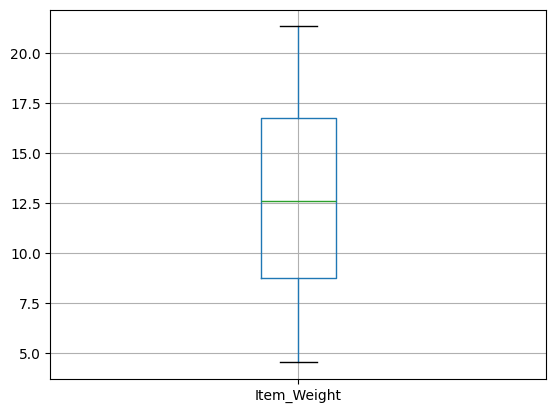

In [18]:
bigMart_data.boxplot(column=["Item_Weight"])
plt.show

There is no outlier in this attribute, let's check if next attribute got any.

#### Checking "Item_Visibility" Outliers

<function matplotlib.pyplot.show(close=None, block=None)>

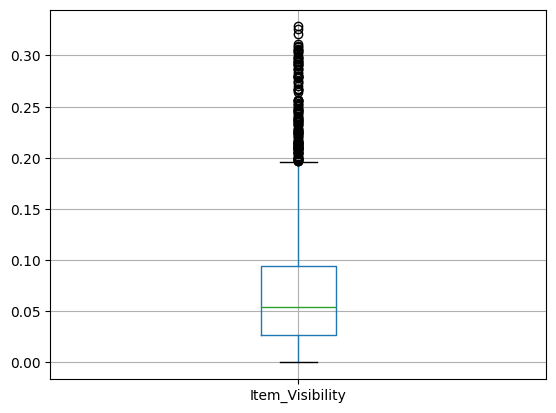

In [19]:
bigMart_data.boxplot(column=["Item_Visibility"])
plt.show

Looking at the box plot, it seems that the variables "Item_Visibility", have outlier present in the variables. These outliers value needs to be teated and there are several ways of treating them:

* Drop the outlier value
* Replace the outlier value using the IQR

In [20]:
#def remove_outliear(col):
#create a user defined function called remove_outliner for getting the threshold value from IQR

def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.74])
    IQR=Q3-Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    
    return lower_range, upper_range

In [21]:
lower_range, upper_range = remove_outlier(bigMart_data['Item_Visibility'])
bigMart_data['Item_Visibility']=np.where(bigMart_data['Item_Visibility']>upper_range,upper_range,bigMart_data['Item_Visibility'])
bigMart_data['Item_Visibility']=np.where(bigMart_data['Item_Visibility']<lower_range,lower_range,bigMart_data['Item_Visibility'])


In [22]:
lower_range

-0.07185071408999999

In [23]:
upper_range

0.19172313014999998

Boxplot After removing outlier

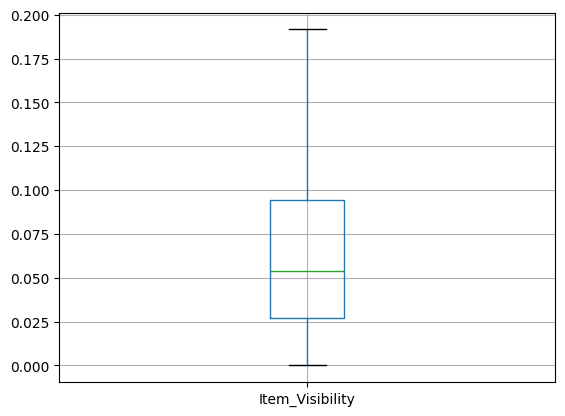

In [24]:
bigMart_data.boxplot(column=['Item_Visibility'])
plt.show()

#### Checking "Item_MRP" Outliers

<function matplotlib.pyplot.show(close=None, block=None)>

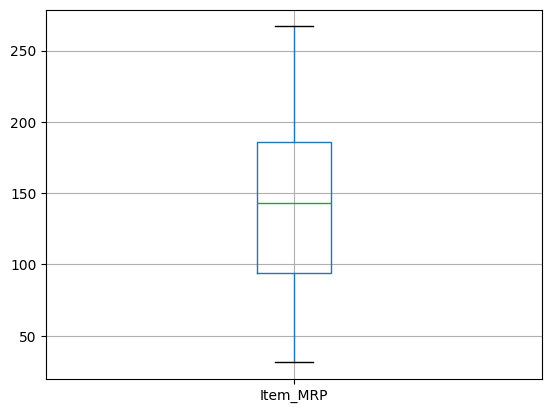

In [25]:
bigMart_data.boxplot(column=["Item_MRP"])
plt.show

There is no outlier in 'Item_MRP', let's check if next attribute got any.

#### Checking "Outlet_Establishment_Year" Outliers

<function matplotlib.pyplot.show(close=None, block=None)>

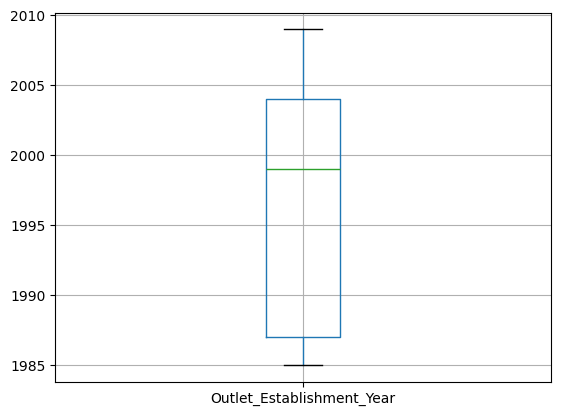

In [26]:
bigMart_data.boxplot(column=["Outlet_Establishment_Year"])
plt.show

There is no outlier in 'Item_MRP', let's check if next attribute got any.

We have tried to graph and see the outlier values in all of the columns, and found out that there were just one columns which were having some outlier values. We have removed them using the remove_outlier() function.

### Normalizing and Scaling
Often the variables of the data set are of different scales i.e. one variable is in millions and others in only 100. 

Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.

In this method, we convert variables with different scales of measurements into a single scale. StandardScaler normalizes the data using the formula (x-mean)/standard deviation. We will be doing this only for the numerical variables.

In [27]:
#scales the data, Essentially returns the z-scores of every attribute
# z-score: z-score )also called a standard score) gives you an idea of how far from the mean a data point is.
#but more technically it's measure of how many standard deviations below or above the population mean a raw score is 

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
print('setup imported',std_scale)

setup imported StandardScaler()


In [28]:
bigMart_data['Item_Weight']=std_scale.fit_transform(bigMart_data[['Item_Weight']])
bigMart_data['Item_Visibility']=std_scale.fit_transform(bigMart_data[['Item_Visibility']])
bigMart_data['Item_MRP']=std_scale.fit_transform(bigMart_data[['Item_MRP']])
bigMart_data['Outlet_Establishment_Year']=std_scale.fit_transform(bigMart_data[['Outlet_Establishment_Year']])
bigMart_data['Item_Outlet_Sales']=std_scale.fit_transform(bigMart_data[['Item_Outlet_Sales']])

__I've commented the Normalization code, As it was disturbing the output values, and overall results of the different algorithms, We can uncomment the above cell code and can try to see how's it performing with normalization too...__

In [29]:
bigMart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,-0.766539,Low Fat,-1.011166,Dairy,1.747454,OUT049,0.139541,Medium,Tier 1,Supermarket Type1,0.910601
1,DRC01,-1.496443,Regular,-0.944744,Soft Drinks,-1.489023,OUT018,1.334103,Medium,Tier 3,Supermarket Type2,-1.018440
2,FDN15,1.004233,Low Fat,-0.996512,Meat,0.010040,OUT049,0.139541,Medium,Tier 1,Supermarket Type1,-0.049238
3,FDX07,1.371344,Regular,-1.341070,Fruits and Vegetables,0.660050,OUT010,0.020085,Medium,Tier 3,Grocery Store,-0.849103
4,NCD19,-0.846440,Low Fat,-1.341070,Household,-1.399220,OUT013,-1.293934,High,Tier 3,Supermarket Type1,-0.695373


## Exploratory Data Analysis (eda) - Graphs
“A picture is worth a thousand words”.

The quote is definitely true of Data visualization as the information conveyed is more valuable than the old saying.
Data visualization is the process of representing data using visual elements like charts, graphs, etc. that helps in deriving meaningful insights from the data. It is aimed at revealing the information behind the data and further aids the viewer in seeing the structure in the data.

Data visualization will make the scientific findings accessible to anyone with minimal exposure in data science and helps one to communicate the information easily. It is to be understood that the visualization technique one employs for a particular data set depends on the individual’s taste and preference.

In [30]:
bigMart_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year    float64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### Plot the data 
There are many different plot types, for now we are simply plotting all the data using one line of code to make this happended.

<Axes: >

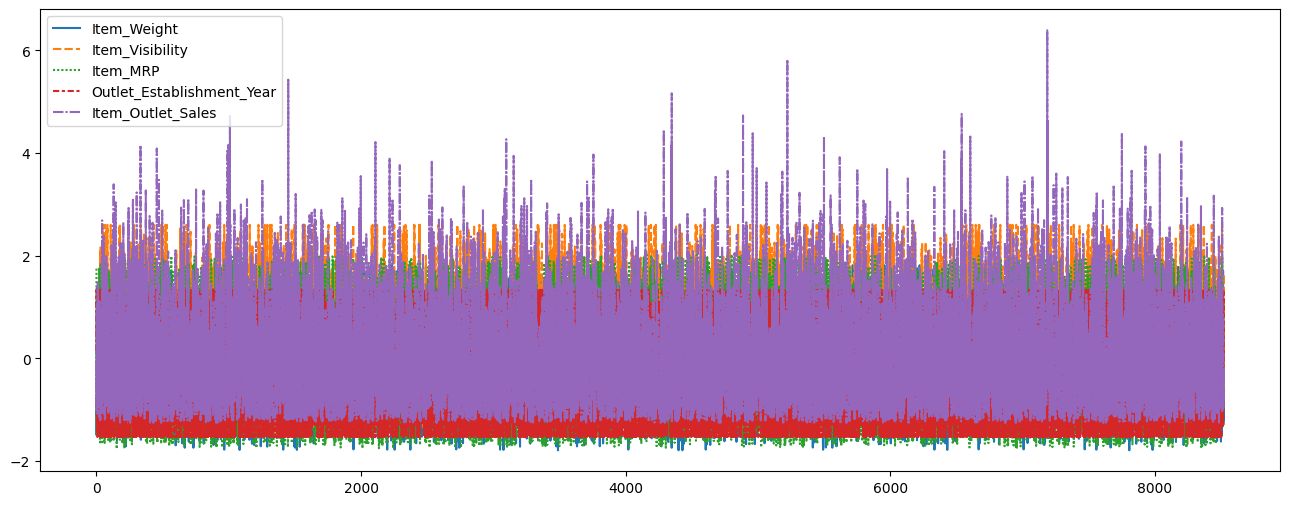

In [31]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))

# Line chart showing how FIFA rankings evolved over time 
sns.lineplot(data=bigMart_data)

As the data is big therefore it is not quit well visible here
### Heatmap
We have one more plot type which is heatmaps

ValueError: could not convert string to float: 'FDA15'

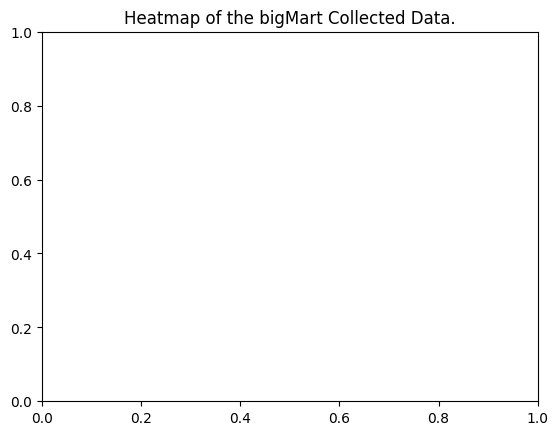

In [32]:
# Set the width and height of the figure
# plt.figure(figsize=(14,7))

# Add title
plt.title("Heatmap of the bigMart Collected Data.")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(bigMart_data.corr(), cmap="YlGnBu", annot=True)

# Add label for horizontal axis
plt.xlabel("X-Axis")

### Data Visulization Using Count Plots

Show the counts of observations in each categorical bin using bars.

A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot(), so you can compare counts across nested variables.

Input data can be passed in a variety of formats, including:

* Vectors of data represented as lists, numpy arrays, or pandas Series objects passed directly to the x, y, and/or hue parameters.

* A “long-form” DataFrame, in which case the x, y, and hue variables will determine how the data are plotted.

* A “wide-form” DataFrame, such that each numeric column will be plotted.

* An array or list of vectors.

#### Count Plot of "Item_Fat_Content"

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

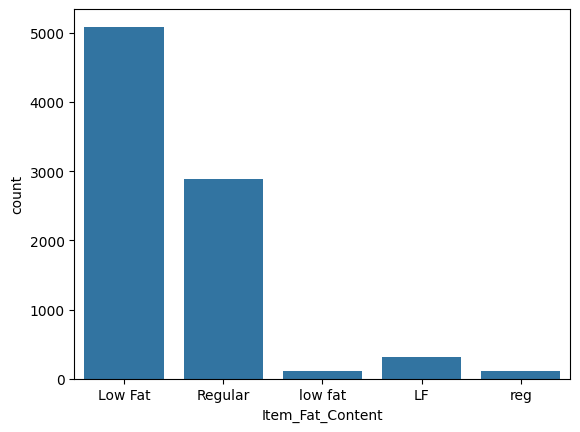

In [33]:
sns.countplot(x='Item_Fat_Content',data=bigMart_data)

#### Count Plot of "Outlet_Size"

<Axes: xlabel='Outlet_Size', ylabel='count'>

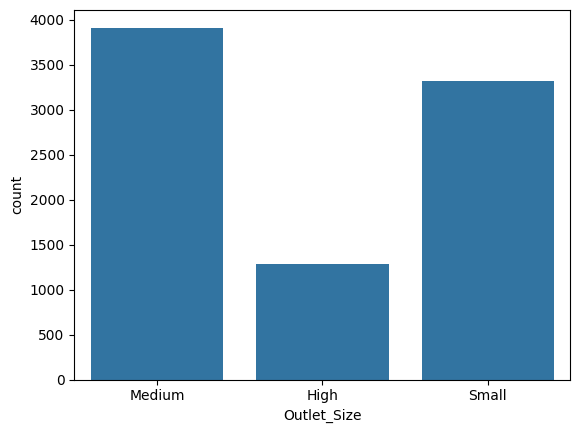

In [34]:
sns.countplot(x='Outlet_Size',data=bigMart_data)

#### Count Plot of "Outlet_Type"

<Axes: xlabel='Outlet_Type', ylabel='count'>

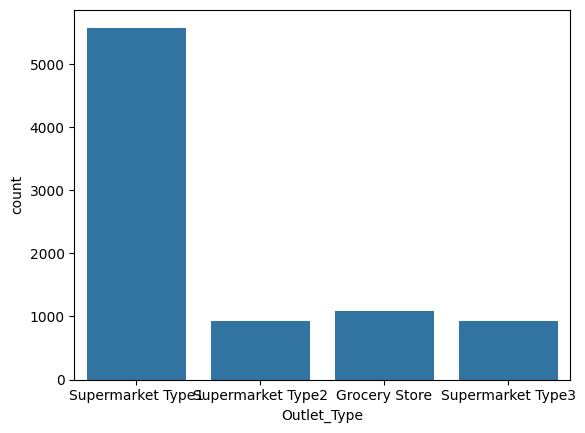

In [35]:
sns.countplot(x='Outlet_Type',data=bigMart_data)

#### Box Plot of "Item_Weight"
Draw a box plot to show distributions with respect to categories.

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

<Axes: xlabel='Item_Weight'>

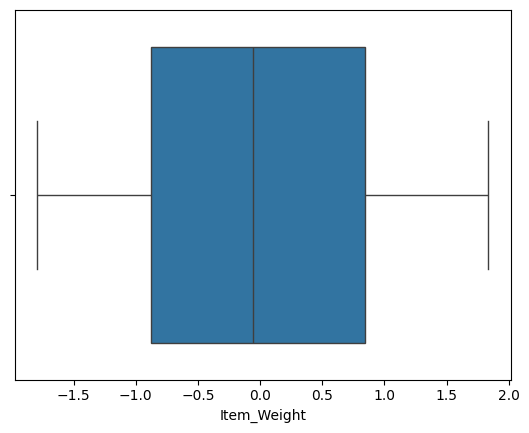

In [36]:
sns.boxplot(x='Item_Weight' ,data=bigMart_data)

#### Histogram Plot of "Item_Outlet_Sales"
Plot univariate or bivariate histograms to show distributions of datasets.

A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within disrete bins.

This function can normalize the statistic computed within each bin to estimate frequency, density or probability mass, and it can add a smooth curve obtained using a kernel density estimate, similar to kdeplot().

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

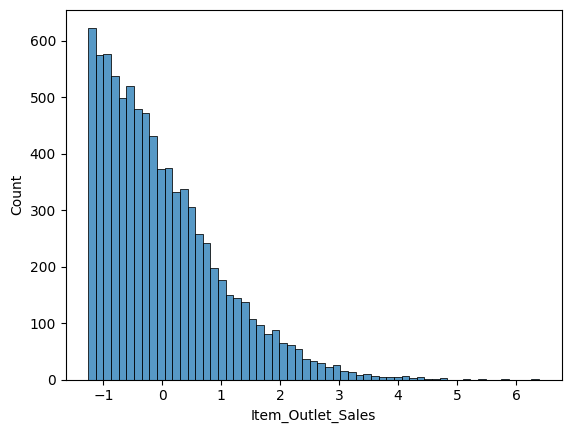

In [37]:
sns.histplot(x='Item_Outlet_Sales',data=bigMart_data)

### Bivariate Analysis
Bivariate analysis is a kind of statistical analysis when two variables are observed against each other. One of the variables will be dependent and the other is independent. The variables are denoted by X and Y. The changes are analyzed between the two variables to understand to what extent the change has occurred.

#### Bivariate Analysis Between 'Item_MRP' and 'Item_Outlet_Sales'

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

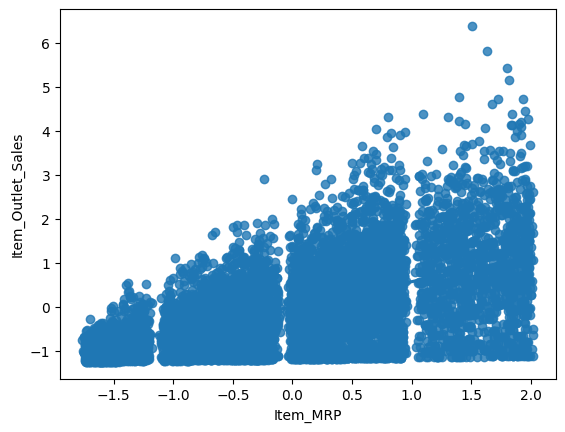

In [38]:
sns.regplot(x='Item_MRP',y='Item_Outlet_Sales',data=bigMart_data)

#### Bivariate Analysis Between 'Outlet_Establishment_Year' and 'Item_Outlet_Sales'

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

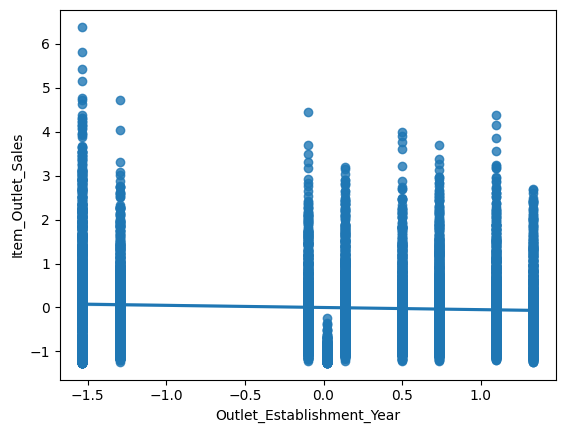

In [40]:
sns.regplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=bigMart_data)

#### Bivariate Analysis Between 'Outlet_Type' and 'Item_Outlet_Sales'

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

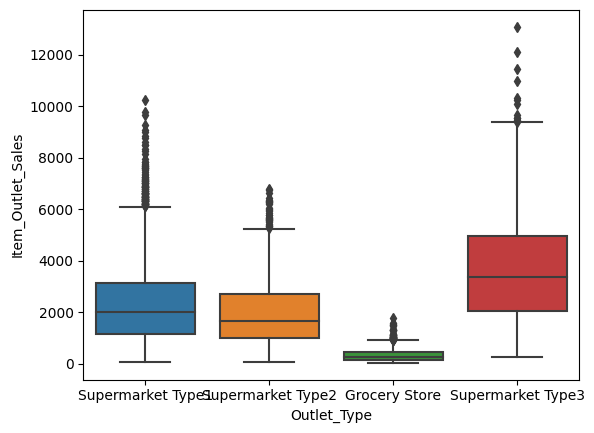

In [33]:
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=bigMart_data)

#### Bivariate Analysis Between 'Item_Visibility' and 'Item_Outlet_Sales'

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

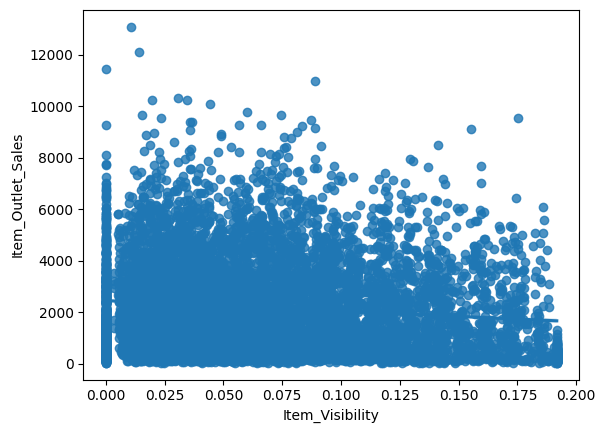

In [34]:
sns.regplot(x='Item_Visibility',y='Item_Outlet_Sales',data=bigMart_data)

#### Bivariate Analysis Between 'Outlet_Size' and 'Item_Outlet_Sales'

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

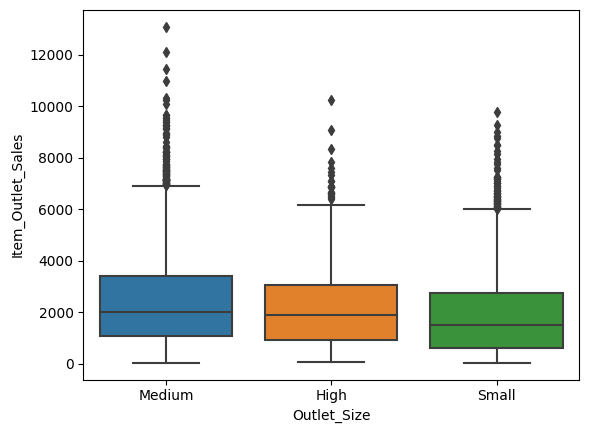

In [35]:
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=bigMart_data)

## Converting Categorical To Numerical
In many practical Data Science activities, the data set will contain categorical variables. These variables are typically stored as text values which represent various traits. Some examples include color (“Red”, “Yellow”, “Blue”), size (“Small”, “Medium”, “Large”) or geographic designations (State or Country). Regardless of what the value is used for, the challenge is determining how to use this data in the analysis. Many machine learning algorithms can support categorical values without further manipulation but there are many more algorithms that do not. Therefore, the analyst is faced with the challenge of figuring out how to turn these text attributes into numerical values for further processing.

As with many other aspects of the Data Science world, there is no single answer on how to approach this problem. Each approach has trade-offs and has potential impact on the outcome of the analysis. Fortunately, the python tools of pandas and scikit-learn provide several approaches that can be applied to transform the categorical data into suitable numeric values. This article will be a survey of some of the various common (and a few more complex) approaches in the hope that it will help others apply these techniques to their real world problems.

In the given code. We are just seeing the types of different column of the bigMart_data set.

In [41]:
bigMart_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year    float64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Since we are only focus on encoding the categorical variables, we are going to include only the object columns in our dataframe. Pandas has a helpful select_dtypes function which we can use to build a new dataframe containing only the object columns.

In [42]:
obj_df = bigMart_data.select_dtypes(include=['object']).copy()
obj_df.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


I've tried doing different operation to convert them togather but I wasn't able to do that, therefore I am not using above obj_df but not deleting the line too as it may be helpful in some other thing.

This method is useful for obtaining a numeric representation of an array when all that matters is identifying distinct values. factorize is available as both a top-level function pandas.factorize(), and as a method Series.factorize() and Index.factorize().

In [43]:
bigMart_data['Item_Fat_Content']=pd.factorize(bigMart_data.Item_Fat_Content)[0]
bigMart_data['Item_Type']=pd.factorize(bigMart_data.Item_Type)[0]
bigMart_data['Item_Identifier']=pd.factorize(bigMart_data.Item_Identifier)[0]
bigMart_data['Outlet_Identifier']=pd.factorize(bigMart_data.Outlet_Identifier)[0]
bigMart_data['Outlet_Size']=pd.factorize(bigMart_data.Outlet_Size)[0]
bigMart_data['Outlet_Location_Type']=pd.factorize(bigMart_data.Outlet_Location_Type)[0]
bigMart_data['Outlet_Type']=pd.factorize(bigMart_data.Outlet_Type)[0]

bigMart_data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,-0.766539,0,-1.011166,0,1.747454,0,0.139541,0,0,0,0.910601
1,1,-1.496443,1,-0.944744,1,-1.489023,1,1.334103,0,1,1,-1.018440
2,2,1.004233,0,-0.996512,2,0.010040,0,0.139541,0,0,0,-0.049238
3,3,1.371344,1,-1.341070,3,0.660050,2,0.020085,0,1,2,-0.849103
4,4,-0.846440,0,-1.341070,4,-1.399220,3,-1.293934,1,1,0,-0.695373


Machine learning models follow a simple rule: whatever goes in, comes out. If we put garbage into our model, we can expect the output to be garbage too. In this case, garbage refers to noise in our data.

To train a model, we collect enormous quantities of data to help the machine learn better. Usually, a good portion of the data collected is noise, while some of the columns of our dataset might not contribute significantly to the performance of our model. Further, having a lot of data can slow down the training process and cause the model to be slower. The model may also learn from this irrelevant data and be inaccurate.

In [44]:
bigMart_data=bigMart_data.drop("Item_Identifier", axis='columns')
bigMart_data=bigMart_data.drop("Outlet_Identifier", axis='columns')
#bigMart_data=bigMart_data.drop("Outlet_Establishment_Year", axis='columns')
#bigMart_data=bigMart_data.drop("Item_Visibility", axis='columns')

bigMart_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-0.766539,0,-1.011166,0,1.747454,0.139541,0,0,0,0.910601
1,-1.496443,1,-0.944744,1,-1.489023,1.334103,0,1,1,-1.018440
2,1.004233,0,-0.996512,2,0.010040,0.139541,0,0,0,-0.049238
3,1.371344,1,-1.341070,3,0.660050,0.020085,0,1,2,-0.849103
4,-0.846440,0,-1.341070,4,-1.399220,-1.293934,1,1,0,-0.695373


## Seperating Training And Test Data
Let's seperate our training data set in training and testing data

In [45]:
from sklearn.model_selection import train_test_split

X = bigMart_data.drop(labels = 'Item_Outlet_Sales' , axis = 1)
y = bigMart_data[['Item_Outlet_Sales']]

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(5966, 9) (5966, 1)
(2557, 9) (2557, 1)


## Running The Models
### Linear Regression
Let’s try to implement the linear regression model

#### Implementing Linear Regression Using sklearn

In [47]:
#creating a model
from sklearn.linear_model import LinearRegression


# creating a object
regressor = LinearRegression()

#training the model
regressor.fit(xtrain,ytrain)

#using the training dataset for the training
pred_train=regressor.predict(xtrain)

#using the training dataset for the prediction
pred_test=regressor.predict(xtest)

#model performance
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
mse = mean_squared_error(ytest,pred_test)
mae = mean_absolute_error(ytest,pred_test)


# Results

print("Mean Squared Error : ", mse)
print("Mean Absolute Error : ", mae)

print("Y-intercept :"  , regressor.intercept_)
print("Slope :" , regressor.coef_)


Mean Squared Error :  0.5964428495200192
Mean Absolute Error :  0.5847967575018236
Y-intercept : [0.02969657]
Slope : [[-0.00729419  0.00454788 -0.1056461   0.0029852   0.57316506 -0.19846496
  -0.21020857  0.21213938 -0.10089016]]


In [48]:
print('First 5 Training Prediction:') 
print(pred_train[0:5])

print('First 5 Testing Prediction:')
print(pred_test[0:5])

First 5 Training Prediction:
[[-0.34599125]
 [-0.60870091]
 [ 0.20715249]
 [ 0.57828259]
 [ 0.65020622]]
First 5 Testing Prediction:
[[-0.1750427 ]
 [-1.25384143]
 [-0.822003  ]
 [ 0.59803561]
 [ 0.53686171]]


R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit).

In [49]:
# R2 for Linear regression
r2_test = r2_score(ytest,pred_test)
r2_train=r2_score(ytrain,pred_train)

print("Training R-Squared  :" , r2_train)
print("Testing R-Squared  :" , r2_test)

Training R-Squared  : 0.38908230377495134
Testing R-Squared  : 0.3799622063229068


Text(0, 0.5, 'R_2 Score')

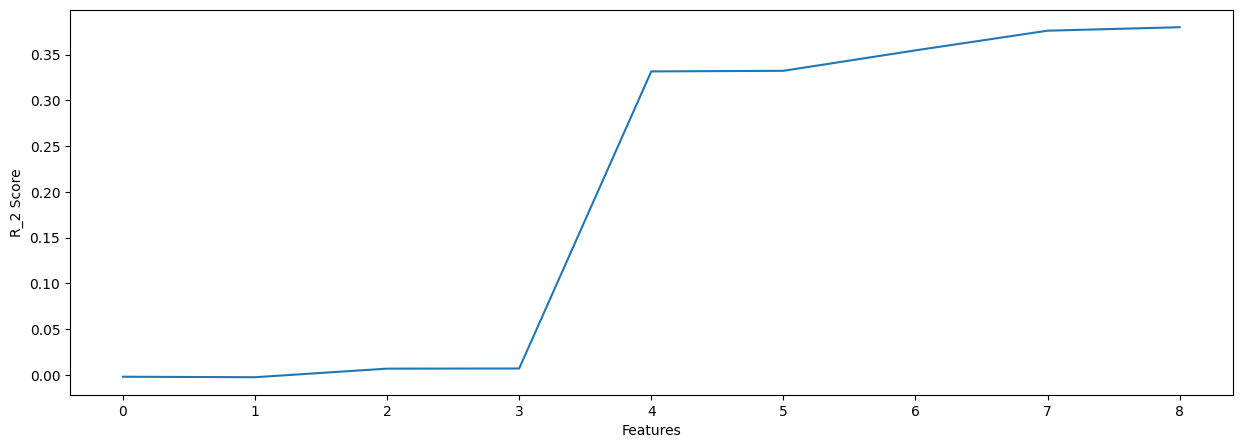

In [50]:
#r sqaure graph
r_2 = []
for i in range(1, (xtest.shape[-1])+1):
    m=LinearRegression()
    m.fit(xtrain.values[:,:i],ytrain)
    prd=m.predict(xtest.values[:,:i])
    r_2.append(r2_score(ytest,prd))
    
plt.figure(figsize=(15,5))
plt.plot(r_2);
plt.xlabel('Features')
plt.ylabel('R_2 Score')

In [52]:
'''
# Residual Plot of Linear Regression
from yellowbrick.regressor import ResidualsPlot

plt.figure(figsize=(15,6)) 
visualizer = ResidualsPlot(regressor,hist=True)
visualizer.fit(xtrain.values, ytrain.values)  
visualizer.score(xtest.values, ytest.values)  
visualizer.poof()
  
'''

'\n# Residual Plot of Linear Regression\nfrom yellowbrick.regressor import ResidualsPlot\n\nplt.figure(figsize=(15,6)) \nvisualizer = ResidualsPlot(regressor,hist=True)\nvisualizer.fit(xtrain.values, ytrain.values)  \nvisualizer.score(xtest.values, ytest.values)  \nvisualizer.poof()\n  \n'

#### Implementation of Linear Regression using Statsmodel,

In [53]:
import statsmodels.api as sm

#adding a constant
X = sm.add_constant(X)

#performing the regression
result = sm.OLS(y, X).fit()

# Result of statsmodels 
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     597.3
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        12:25:08   Log-Likelihood:                -10008.
No. Observations:                8523   AIC:                         2.004e+04
Df Residuals:                    8513   BIC:                         2.011e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Decision Tree Model

You will use the scikit-learn library to create your models. When coding, this library is written as sklearn, as you will see in the sample code. Scikit-learn is easily the most popular library for modeling the types of data typically stored in DataFrames.

The steps to building and using a model are:

Define: What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.
Fit: Capture patterns from provided data. This is the heart of modeling.
Predict: Just what it sounds like
Evaluate: Determine how accurate the model's predictions are.
Here is an example of defining a decision tree model with scikit-learn and fitting it with the features and target variable.

In [54]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(X, y)

print("Making predictions for the following First 5 Row:")
print(X.head())

print("The predictions are")
print(melbourne_model.predict(X.head()))

Making predictions for the following First 5 Row:
   const  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0    1.0    -0.766539                 0        -1.011166          0  1.747454   
1    1.0    -1.496443                 1        -0.944744          1 -1.489023   
2    1.0     1.004233                 0        -0.996512          2  0.010040   
3    1.0     1.371344                 1        -1.341070          3  0.660050   
4    1.0    -0.846440                 0        -1.341070          4 -1.399220   

   Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type  
0                   0.139541            0                     0            0  
1                   1.334103            0                     1            1  
2                   0.139541            0                     0            0  
3                   0.020085            0                     1            2  
4                  -1.293934            1                     1     

### Random Forest for Regression
In this section, we will look at using random forests for a regression problem.

Decision trees leave you with a difficult decision. A deep tree with lots of leaves will overfit because each prediction is coming from historical data from only the few houses at its leaf. But a shallow tree with few leaves will perform poorly because it fails to capture as many distinctions in the raw data.

Even today's most sophisticated modeling techniques face this tension between underfitting and overfitting. But, many models have clever ideas that can lead to better performance. We'll look at the random forest as an example.

The random forest uses many trees, and it makes a prediction by averaging the predictions of each component tree. It generally has much better predictive accuracy than a single decision tree and it works well with default parameters. If you keep modeling, you can learn more models with even better performance, but many of those are sensitive to getting the right parameters.

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(xtrain, ytrain)

melb_preds = forest_model.predict(xtest)
pred_tr=forest_model.predict(xtrain)


print('First 5 Training Prediction:') 
print(pred_tr[0:5])

print('First 5 Testing Prediction:')
print(melb_preds[0:5])

print('Mean Absolute Error :', mean_absolute_error(ytest, melb_preds))

c:\Users\pc planet\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


First 5 Training Prediction:
[-1.17563537 -0.36631201  1.08131179  0.29145052  0.85798546]
First 5 Testing Prediction:
[-0.81223114 -0.75573333 -0.97343719  1.8694875   0.10987326]
Mean Absolute Error : 0.45496762594603735


R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit).

In [56]:
# R2 for the random Forest Regressor
r2_tr=r2_score(ytrain,pred_tr)


pred_ts=forest_model.predict(xtest)
r2_ts=r2_score(ytest,pred_ts)                             
r2_ts

print("Training R-Squared  :" , r2_tr)
print("Testing R-Squared  :" , r2_ts)

Training R-Squared  : 0.9370542927038542
Testing R-Squared  : 0.5565941925894173


### Using Ridge Regression

Ridge regression is the method used for the analysis of multicollinearity in multiple regression data. It is most suitable when a data set contains a higher number of predictor variables than the number of observations. The second-best scenario is when multicollinearity is experienced in a set.

In [59]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.001)

ridge.fit(xtrain,ytrain)
y_train_r=ridge.predict(xtrain)
y_test_r = ridge.predict(xtest)


print('First 5 Training Prediction:') 
print(y_train_r[0:5])

print('First 5 Testing Prediction:')
print(y_test_r[0:5])

First 5 Training Prediction:
[[-0.34599117]
 [-0.60870071]
 [ 0.20715242]
 [ 0.57828246]
 [ 0.65020598]]
First 5 Testing Prediction:
[[-0.17504279]
 [-1.25384114]
 [-0.82200284]
 [ 0.59803548]
 [ 0.53686163]]


In [60]:
#R2 for the ridge
train_ridge_score=r2_score(ytrain,y_train_r)
test_ridge_score=r2_score(ytest,y_test_r)

print("Training R-Squared  :" , train_ridge_score)
print("Testing R-Squared  :" , test_ridge_score)

Training R-Squared  : 0.3890823037749306
Testing R-Squared  : 0.3799622157379966


R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit).

In [62]:
'''
# Residual Plot of Linear Regression
from yellowbrick.regressor import ResidualsPlot

plt.figure(figsize=(15,6)) 
visualizer = ResidualsPlot(ridge,hist=True)
visualizer.fit(xtrain.values, ytrain.values)  
visualizer.score(xtest.values, ytest.values)  
visualizer.poof()
'''  

'\n# Residual Plot of Linear Regression\nfrom yellowbrick.regressor import ResidualsPlot\n\nplt.figure(figsize=(15,6)) \nvisualizer = ResidualsPlot(ridge,hist=True)\nvisualizer.fit(xtrain.values, ytrain.values)  \nvisualizer.score(xtest.values, ytest.values)  \nvisualizer.poof()\n'

### Using Polynomial Feature
It's not a coincidence: polynomial regression is a linear model used for describing non-linear relationships. 

In [63]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=4)

xtrain_poly=poly_features.fit_transform(xtrain)
poly_model = LinearRegression()
poly_model.fit(xtrain_poly, ytrain)

y_train_predicted = poly_model.predict(xtrain_poly)

xtest_poly=poly_features.fit_transform(xtest)
y_test_predict = poly_model.predict(xtest_poly)


print('First 5 Training Prediction:') 
print(y_train_predicted[0:5])

print('First 5 Testing Prediction:')
print(y_test_predict[0:5])

First 5 Training Prediction:
[[-1.15452629]
 [-0.44773479]
 [ 0.71988644]
 [ 0.31465333]
 [ 0.41819689]]
First 5 Testing Prediction:
[[-0.46922931]
 [-0.82519699]
 [-1.04485   ]
 [ 1.4727965 ]
 [ 0.83509549]]


In [64]:
# R2 for poly feature
r2_train=r2_score(ytrain,y_train_predicted)
r2_test=r2_score(ytest,y_test_predict)


print("Training R-Squared  :" , r2_train)
print("Testing R-Squared  :" , r2_test)

Training R-Squared  : 0.6420798379920741
Testing R-Squared  : 0.5580096778922206


R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit).

## Hyper Parameter Tuning XGB And GBR
Boosting algorithms play a crucial role in dealing with bias variance trade-off.  Unlike bagging algorithms, which only controls for high variance in a model, boosting controls both the aspects (bias & variance), and is considered to be more effective.

### XGBoost for Regression

Extreme Gradient Boosting (XGBoost) is an open-source library that provides an efficient and effective implementation of the gradient boosting algorithm.

Regression predictive modeling problems involve predicting a numerical value such as a dollar amount or a height. XGBoost can be used directly for regression predictive modeling.

In [55]:

# check xgboost version
import xgboost
print('xgboost Version', xgboost.__version__)

from xgboost import XGBRegressor

# create an xgboost regression model
xgb=XGBRegressor()

xgb.fit(xtrain,ytrain)


xgboost Version 1.6.2


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [56]:
train_x=xgb.predict(xtrain)
test_x=xgb.predict(xtest)


print('First 5 Training Prediction:') 
print(train_x[0:5])

print('First 5 Testing Prediction:')
print(test_x[0:5])

First 5 Training Prediction:
[ 389.55606 1420.7844  4140.882   2519.5918  3564.8804 ]
First 5 Testing Prediction:
[ 946.3889   784.41174  794.22235 4968.1514  2562.8389 ]


R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit).

In [57]:
# R2 score of XGB

train_r2=r2_score(ytrain,train_x)
test_r2=r2_score(ytest,test_x)


print("Training R-Squared  :" , train_r2)
print("Testing R-Squared  :" , test_r2)

Training R-Squared  : 0.8764580761572414
Testing R-Squared  : 0.5373058647490068


In [58]:
# Finding best Hyperparameter Tunning XGB

from sklearn.model_selection import GridSearchCV
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
xg=XGBRegressor()
Grid1 = GridSearchCV(xg, parameters1,cv=4)
Grid1.fit(xtrain,ytrain) 
BestRR=Grid1.best_estimator_
pred_g=BestRR.predict(xtest)
pred_train=BestRR.predict(xtrain)


print('First 5 Training Prediction:') 
print(pred_g[0:5])

print('First 5 Testing Prediction:')
print(pred_train[0:5])

First 5 Training Prediction:
[1329.1824  683.3219  685.7078 5174.2993 3195.7222]
First 5 Testing Prediction:
[ 509.1434 1639.1865 3143.0144 3574.3208 3146.487 ]


In [59]:
# R2 score of best Hyperparameter Tunning XGB
gr_score_train=r2_score(ytrain,pred_train)
gr_score=r2_score(ytest,pred_g)


print("Training R-Squared  :" , gr_score_train)
print("Testing R-Squared  :" , gr_score)

Training R-Squared  : 0.6091080880421429
Testing R-Squared  : 0.5870021324069385


### Gradient Boosting Regression (GBR)
"Boosting" in machine learning is a way of combining multiple simple models into a single composite model. This is also why boosting is known as an additive model, since simple models (also known as weak learners) are added one at a time, while keeping existing trees in the model unchanged. As we combine more and more simple models, the complete final model becomes a stronger predictor. The term "gradient" in "gradient boosting" comes from the fact that the algorithm uses gradient descent to minimize the loss.

When gradient boost is used to predict a continuous value – like age, weight, or cost – we're using gradient boost for regression. This is not the same as using linear regression.



In [60]:
from sklearn.ensemble import GradientBoostingRegressor
GD=GradientBoostingRegressor()

GD.fit(xtrain,ytrain)
pred_train_gd=GD.predict(xtrain)
pred_test_gd=GD.predict(xtest)

print('First 5 Training Prediction:') 
print(pred_train_gd[0:5])

print('First 5 Testing Prediction:')
print(pred_test_gd[0:5])

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


First 5 Training Prediction:
[ 648.57261382 1613.8625998  3628.58827166 3432.94979812 3186.80871304]
First 5 Testing Prediction:
[1276.46548988  722.52601945  728.63134077 4743.74485889 3288.1362539 ]


In [61]:
# R2 score of GB
r2_score_train=r2_score(ytrain,pred_train_gd)
r2_score_test=r2_score(ytest,pred_test_gd)

print("Training R-Squared  :" , r2_score_train)
print("Testing R-Squared  :" , r2_score_test)

Training R-Squared  : 0.6389177497583243
Testing R-Squared  : 0.5923294769339444


## Final Predictions On The Test Dataset

In [62]:
# Reading test data set using pandas
test_data=pd.read_csv('Test.csv')
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Let's prepare our test data for the model

In [63]:
test_data['Item_Fat_Content']=pd.factorize(test_data.Item_Fat_Content)[0]
test_data['Item_Type']=pd.factorize(test_data.Item_Type)[0]
test_data['Item_Identifier']=pd.factorize(test_data.Item_Identifier)[0]
test_data['Outlet_Identifier']=pd.factorize(test_data.Outlet_Identifier)[0]
test_data['Outlet_Size']=pd.factorize(test_data.Outlet_Size)[0]
test_data['Outlet_Location_Type']=pd.factorize(test_data.Outlet_Location_Type)[0]
test_data['Outlet_Type']=pd.factorize(test_data.Outlet_Type)[0]


test_data.loc[:,test_data.columns] = test_data.loc[:,test_data.columns].ffill()
# get the number of missing data points per column
missing_values_count = test_data.isnull().sum()

# look at the # of missing points in the first ten columns
#missing_values_count[0:10]

print(missing_values_count)

print('bigMart_data Shape',bigMart_data.shape)
print('Orignal test_data shape', test_data.shape)

#dropping some features
test_data=test_data.drop("Item_Identifier", axis='columns')
test_data=test_data.drop("Outlet_Identifier", axis='columns')
#test_data=test_data.drop("Outlet_Establishment_Year", axis='columns')
#test_data=test_data.drop("Item_Visibility", axis='columns')

test_data.head()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64
bigMart_data Shape (8523, 10)
Orignal test_data shape (5681, 11)


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,0,0.007565,0,107.8622,1999,0,0,0
1,8.300,1,0.038428,1,87.3198,2007,-1,1,0
2,14.600,0,0.099575,2,241.7538,1998,-1,2,1
3,7.315,0,0.015388,0,155.0340,2007,-1,1,0
4,7.315,2,0.118599,1,234.2300,1985,0,2,2


### Checking on Linear Regression

In [64]:
#using the training dataset for the training
pred_train=regressor.predict(xtrain)

#using the training dataset for the prediction
pred_test=regressor.predict(test_data)

print('First 5 Training Prediction:') 
print(pred_train[0:5])

print('First 5 Testing Prediction:')
print(pred_test[0:5])

First 5 Training Prediction:
[[1590.8896173 ]
 [1142.6019868 ]
 [2534.77381417]
 [3168.07003221]
 [3290.80048987]]
First 5 Testing Prediction:
[[1856.83936173]
 [1863.18603904]
 [4596.472357  ]
 [3001.8998958 ]
 [4432.86064093]]


### Checking on Random Forest

In [65]:
pred_tr=forest_model.predict(xtrain)
melb_preds = forest_model.predict(test_data)

print('First 5 Training Prediction:') 
print(pred_tr[0:5])

print('First 5 Testing Prediction:')
print(melb_preds[0:5])

First 5 Training Prediction:
[ 171.736452 1578.252268 4056.699426 2720.605276 3597.6503  ]
First 5 Testing Prediction:
[1520.460828 1103.077466 4104.79016  2545.027158  526.228346]


### Checking on Ridge Regression

In [66]:
y_train_r=ridge.predict(xtrain)
y_test_r = ridge.predict(test_data)


print('First 5 Training Prediction:') 
print(y_train_r[0:5])

print('First 5 Testing Prediction:')
print(y_test_r[0:5])

First 5 Training Prediction:
[[1590.9105037 ]
 [1142.58738091]
 [2534.76917097]
 [3168.08553371]
 [3290.80988078]]
First 5 Testing Prediction:
[[1856.82515208]
 [1863.18110677]
 [4596.48464515]
 [3001.88885828]
 [4432.87442881]]


### Checking on Polynomial Feature

In [67]:
y_train_predicted = poly_model.predict(xtrain_poly)

xtest_poly=poly_features.fit_transform(test_data)
y_test_predict = poly_model.predict(xtest_poly)


print('First 5 Training Prediction:') 
print(y_train_predicted[0:5])

print('First 5 Testing Prediction:')
print(y_test_predict[0:5])

First 5 Training Prediction:
[[ 127.88628249]
 [1451.02267142]
 [3162.67947539]
 [2801.59345062]
 [3019.51353538]]
First 5 Testing Prediction:
[[ 1.91063873e+03]
 [-1.39110212e+05]
 [ 2.44873555e+06]
 [-2.31209085e+05]
 [ 3.69459267e+06]]


### Checking on XGBoost

In [68]:
train_x=xgb.predict(xtrain)
test_x=xgb.predict(test_data)


print('First 5 Training Prediction:') 
print(train_x[0:5])

print('First 5 Testing Prediction:')
print(test_x[0:5])

First 5 Training Prediction:
[ 389.55606 1420.7844  4140.882   2519.5918  3564.8804 ]
First 5 Testing Prediction:
[1221.8379 1280.8519 3661.9553 2280.6162  645.8161]


### Checking on Gradient Boosting Regression (GBR)

In [69]:
pred_train_gd=GD.predict(xtrain)
pred_test_gd=GD.predict(test_data)

print('First 5 Training Prediction:') 
print(pred_train_gd[0:5])

print('First 5 Testing Prediction:')
print(pred_test_gd[0:5])

First 5 Training Prediction:
[ 648.57261382 1613.8625998  3628.58827166 3432.94979812 3186.80871304]
First 5 Testing Prediction:
[1662.72991299 1359.12717427 3451.84736555 2646.45272127  707.90416828]


## Saving The Final Model
Finding an accurate machine learning model is not the end of the project.
In this following code, you will discover how to save and load your machine learning model in Python using scikit-learn.
This allows you to save your model to file and load it later in order to make predictions.

### Save Your Model with pickle
Pickle is the standard way of serializing objects in Python.
You can use the pickle operation to serialize your machine learning algorithms and save the serialized format to a file.
Later you can load this file to deserialize your model and use it to make new predictions.

In [70]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
# in the following code, I am saving random forest model in a file named "finalized_model.sav"
pickle.dump(forest_model, open(filename, 'wb'))

## Summary 
This project was my first unguided project, so it was great fighting with this. Learning new things and practically implemented them on real life problem as mentioned.
Following are the things which I have done and learn from this project.
* Understanding the problem statement
* Exploring Dataset
* Data Cleaning
* Handling with outliers
* Data visulization 
* Bivariate Anaysis
* Converting Categorical To Numerical Data
* Seperating Training and Test Data
* Training Different Models
* Predicting on Test Dataset
* Saving the Final Model

## Future Work
Following are some of the future work which can be done after this project.
* Try to implement this data on other model and should see thier results
* Try to clean this data in any better way
* Can perfrom any other functions to the data which will give us better results

As far as myself is concenrn, I have following future works for myself after this project
* Try to understand datasets better
* should use mysense is this data is making sense
* Try to improve my theoratical knowldege about algorithms and models. 

__Kaleem Out !!!__